In [21]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns


In [2]:
data1 = pd.read_csv('data1.csv', sep=';')
data2 = pd.read_csv('data2.csv', sep=';')
data3 = pd.read_csv('data3.csv', sep=';')

In [3]:
print(data1.head())
print(data2.head())
print(data3.head())

    ID     RegDate RegCountry RegSource
0  721  2016-01-01          B        SE
1  722  2016-01-01          A        SE
2  723  2016-01-01          A        SE
3  724  2016-01-01          A        SE
4  841  2016-01-01          A        SE
    ID     DepDate               Sum PaymInstr
0  620  2016-01-03  3,06849682010272     Other
1  620  2016-01-03  3,94521019727492     Other
2  620  2016-01-03  4,20822421042658     Other
3  620  2016-01-02  2,63014013151662     Other
4  620  2016-01-02  1,75342675434441     Other
       ID    GameDate  GameHour             SumRevA            SumRevB
0    7315  2016-05-24         7  0,0191815856777494                  0
1  154563  2016-12-23        20    17,3337595907928  -15,3388746803069
2   37537  2016-09-19        18  0,0191815856777494                  0
3    4629  2016-02-25        18                   0                  0
4    4583  2016-02-12         3    9,64194373401535                  0


In [4]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376902 entries, 0 to 376901
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   ID          376902 non-null  int64 
 1   RegDate     376902 non-null  object
 2   RegCountry  376902 non-null  object
 3   RegSource   376902 non-null  object
dtypes: int64(1), object(3)
memory usage: 11.5+ MB


In [5]:
data1['RegDate'] = pd.to_datetime(data1['RegDate'])
data2['DepDate'] = pd.to_datetime(data2['DepDate'])
data3['GameDate'] = pd.to_datetime(data3['GameDate'])

data2['Sum'] = data2['Sum'].apply(lambda x: float(x.replace(',', '.')))
data3['SumRevA'] = data3['SumRevA'].apply(lambda x: float(x.replace(',', '.')))
data3['SumRevB'] = data3['SumRevB'].apply(lambda x: float(x.replace(',', '.')))

In [6]:
data2['DepMonth'] = data2['DepDate'].dt.strftime('%Y-%m')
data1['RegMonth'] = data1['RegDate'].dt.strftime('%Y-%m')


In [8]:
data1['ID'].nunique()

376902

In [40]:
data3

,ID,GameDate,GameHour,SumRevA,SumRevB
0,7315,2016-05-24,7,0.019182,0.000000
1,154563,2016-12-23,20,17.333760,-15.338875
2,37537,2016-09-19,18,0.019182,0.000000
3,4629,2016-02-25,18,0.000000,0.000000
4,4583,2016-02-12,3,9.641944,0.000000
...,...,...,...,...,...
1075775,314692,2017-01-27,16,0.076726,0.000000
1075776,8945,2016-10-23,17,0.140665,0.000000
1075777,5588,2017-01-07,13,0.006394,0.000000
1075778,249127,2017-01-28,18,0.000000,0.000000


In [49]:
data3_rev = data3.groupby('ID', as_index=False)['SumRevA', 'SumRevB'].sum()
data3_rev

<ipython-input-49-fb5094a152d4>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,ID,SumRevA,SumRevB
0,8,0.537084,0.000000
1,9,9.680307,6.476982
2,17,23.887468,0.000000
3,22,1.406650,0.000000
4,31,30.939898,0.000000
...,...,...,...
37468,376874,23.107417,0.000000
37469,376885,1.285166,0.000000
37470,376890,0.901535,0.000000
37471,376891,0.639386,0.000000


In [71]:
data2_sum = data2.groupby('ID', as_index=False).agg({'DepDate': 'min', 'Sum': 'sum'})
data2_sum

,ID,DepDate,Sum
0,8,2016-01-02,2.191783
1,9,2016-01-02,18.410981
2,17,2016-01-05,135.089904
3,31,2016-04-21,44.520431
4,32,2016-03-17,2.250548
...,...,...,...
22697,376861,2016-12-17,4.141672
22698,376874,2016-12-15,19.181586
22699,376885,2016-12-23,4.359635
22700,376890,2016-12-15,5.099704


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='SumRevB'>

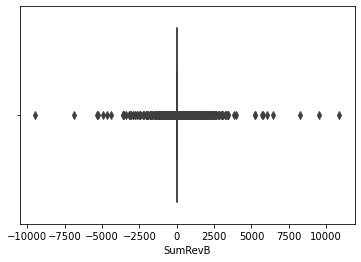

In [32]:
sns.boxplot(data3['SumRevB'])

In [50]:
data = data1.merge(data2_sum, how='left', on='ID').merge(data3_rev, how='left', on='ID')
data


,ID,RegDate,RegCountry,RegSource,RegMonth,Sum,SumRevA,SumRevB
0,721,2016-01-01,B,SE,2016-01,NaN,NaN,NaN
1,722,2016-01-01,A,SE,2016-01,NaN,NaN,NaN
2,723,2016-01-01,A,SE,2016-01,NaN,NaN,NaN
3,724,2016-01-01,A,SE,2016-01,17.690511,8.126598,0.0
4,841,2016-01-01,A,SE,2016-01,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
376897,376755,2016-12-31,A,WM,2016-12,NaN,NaN,NaN
376898,376756,2016-12-31,A,SE,2016-12,NaN,NaN,NaN
376899,376757,2016-12-31,A,SE,2016-12,NaN,NaN,NaN
376900,376758,2016-12-31,A,SE,2016-12,NaN,NaN,NaN


In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 376902 entries, 0 to 376901
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   ID          376902 non-null  int64         
 1   RegDate     376902 non-null  datetime64[ns]
 2   RegCountry  376902 non-null  object        
 3   RegSource   376902 non-null  object        
 4   RegMonth    376902 non-null  object        
 5   Sum         22702 non-null   float64       
 6   SumRevA     37473 non-null   float64       
 7   SumRevB     37473 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 25.9+ MB


In [61]:
no_null_data = data[~data['Sum'].isnull() & ~data['SumRevA'].isnull()]
no_null_data

,ID,RegDate,RegCountry,RegSource,RegMonth,Sum,SumRevA,SumRevB
3,724,2016-01-01,A,SE,2016-01,17.690511,8.126598,0.000000
6,843,2016-01-01,A,WM,2016-01,9.041055,4.290281,0.000000
24,490,2016-01-01,A,SE,2016-01,22.869144,3.523018,0.000000
25,491,2016-01-01,A,WM,2016-01,82.262035,33.554987,0.000000
27,493,2016-01-01,A,SE,2016-01,7.619482,0.498721,0.000000
...,...,...,...,...,...,...,...,...
376870,376376,2016-12-28,A,SE,2016-12,4.202431,0.242967,0.000000
376872,376378,2016-12-28,A,SE,2016-12,5.480432,0.076726,0.000000
376877,376383,2016-12-29,A,SE,2016-12,9.676665,1.521739,0.191816
376885,376391,2016-12-30,A,SE,2016-12,25.434325,10.799233,0.000000


In [62]:
# определяем месяц первой покупки для каждого покупателя 
cohorts = no_null_data.groupby('ID', as_index=False)['RegMonth'].min()
cohorts.rename(columns = {'RegMonth': 'Cohort'}, inplace=True)
cohorts

,ID,Cohort
0,8,2016-01
1,9,2016-01
2,17,2016-01
3,31,2016-01
4,32,2016-01
...,...,...
22448,376861,2016-12
22449,376874,2016-12
22450,376885,2016-12
22451,376890,2016-12


In [63]:
# добавим когорты к основным данным
no_null_data = no_null_data.merge(cohorts, how='left', on='ID')
no_null_data

,ID,RegDate,RegCountry,RegSource,RegMonth,Sum,SumRevA,SumRevB,Cohort
0,724,2016-01-01,A,SE,2016-01,17.690511,8.126598,0.000000,2016-01
1,843,2016-01-01,A,WM,2016-01,9.041055,4.290281,0.000000,2016-01
2,490,2016-01-01,A,SE,2016-01,22.869144,3.523018,0.000000,2016-01
3,491,2016-01-01,A,WM,2016-01,82.262035,33.554987,0.000000,2016-01
4,493,2016-01-01,A,SE,2016-01,7.619482,0.498721,0.000000,2016-01
...,...,...,...,...,...,...,...,...,...
22448,376376,2016-12-28,A,SE,2016-12,4.202431,0.242967,0.000000,2016-12
22449,376378,2016-12-28,A,SE,2016-12,5.480432,0.076726,0.000000,2016-12
22450,376383,2016-12-29,A,SE,2016-12,9.676665,1.521739,0.191816,2016-12
22451,376391,2016-12-30,A,SE,2016-12,25.434325,10.799233,0.000000,2016-12
